In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.info

<bound method DataFrame.info of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tut

**Количество строк:** 2392  
**Количество столбцов:** 15  
**Типы данных столбцов:** 3 столбца `float64`, 12 столбцов `int64`  
**Память, занимаемая DataFrame:** 280.4 KB  

**Столбцы и количество ненулевых значений:**
- `StudentID`: 2392 ненулевых значений (`int64`)
- `Age`: 2392 ненулевых значений (`int64`)
- `Gender`: 2392 ненулевых значений (`int64`)
- `Ethnicity`: 2392 ненулевых значений (`int64`)
- `ParentalEducation`: 2392 ненулевых значений (`int64`)
- `StudyTimeWeekly`: 2392 ненулевых значений (`float64`)
- `Absences`: 2392 ненулевых значений (`int64`)
- `Tutoring`: 2392 ненулевых значений (`int64`)
- `ParentalSupport`: 2392 ненулевых значений (`int64`)
- `Extracurricular`: 2392 ненулевых значений (`int64`)
- `Sports`: 2392 ненулевых значений (`int64`)
- `Music`: 2392 ненулевых значений (`int64`)
- `Volunteering`: 2392 ненулевых значений (`int64`)
- `GPA`: 2392 ненулевых значений (`float64`)
- `GradeClass`: 2392 ненулевых значений (`float64`)


In [4]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## Основные статистические характеристики

### Возраст (Age):
- Средний возраст студентов составляет примерно **16.47 лет**.
- Минимальный возраст - **15 лет**, максимальный - **18 лет**.
- Распределение возраста относительно узкое (стандартное отклонение **1.12**).

### Гендер (Gender):
- Пол распределён примерно поровну, так как среднее значение гендера (**0.51**) близко к **0.5**.

### Этническая принадлежность (Ethnicity):
- В среднем большинство студентов принадлежат к категории **0**, так как среднее значение равно **0.88**.

### Образование родителей (ParentalEducation):
- Средний уровень образования родителей равен **1.75** (возможно, это значение по шкале от 0 до 4).

### Время на учёбу в неделю (StudyTimeWeekly):
- В среднем студенты тратят **9.77 часов** в неделю на учёбу.
- Значительное разброс значений (стандартное отклонение **5.65**).

### Пропуски (Absences):
- Среднее количество пропусков составляет **14.54**.
- Минимальное значение - **0**, максимальное - **29**.
- Распределение пропусков также довольно широкое (стандартное отклонение **8.47**).

### Дополнительные занятия (Tutoring):
- Только около **30%** студентов (среднее значение **0.30**) получают дополнительные занятия.

### Поддержка родителей (ParentalSupport):
- В среднем родители оказывают поддержку на уровне **2.12** (возможно, это значение по шкале от 0 до 4).

### Внеклассные занятия (Extracurricular):
- В среднем участие в внеклассных занятиях невелико (**0.38**).

### Спорт (Sports):
- Среднее значение близко к **0.30**, что указывает на то, что около **30%** студентов занимаются спортом.

### Музыка (Music):
- В среднем только около **17%** студентов (**0.17**) занимаются музыкой.

### Волонтёрство (Volunteering):
- Около **15%** студентов (**0.15**) участвуют в волонтёрских проектах.

### Средний балл (GPA):
- Средний GPA составляет **1.91**, что может соответствовать среднему уровню оценок.
- Диапазон GPA от **0.11 до 4.00**, что указывает на широкий разброс академической успеваемости.

### Класс успеваемости (GradeClass):
- Среднее значение класса успеваемости **2.98**, что может соответствовать третьему уровню по шкале от 1 до 4.

## Выводы:
- В выборке преобладают студенты в возрасте от 15 до 18 лет, с равномерным распределением по полу.
- Большинство студентов принадлежат к одной этнической группе.
- Родители студентов в основном имеют средний уровень образования.
- В среднем студенты тратят около 10 часов в неделю на учёбу, но некоторые тратят значительно больше или меньше.
- Количество пропусков занятий варьируется значительно, что может указывать на разные уровни дисциплины или другие факторы.
- Дополнительные занятия и поддержка родителей присутствуют не у всех студентов.
- Участие во внеклассных занятиях, спорте, музыке и волонтёрских проектах невелико.
- Широкий разброс GPA и класса успеваемости указывает на разнообразие академической успеваемости среди студентов.


# Анализ данных студентов

## 1. Исследование корреляций
Исследуйте корреляции между различными переменными, чтобы выявить потенциальные зависимости. Например:

- Корреляция между временем на учёбу в неделю (StudyTimeWeekly) и средним баллом (GPA).
- Корреляция между количеством пропусков (Absences) и средним баллом (GPA).

## 2. Визуализация данных
Создайте визуализации для лучшего понимания распределений и связей:

- **Гистограммы** для распределения значений (например, GPA, количество пропусков).
- **Корреляционная матрица** для визуализации корреляций между переменными.
- **Диаграммы рассеяния** для анализа пар переменных (например, StudyTimeWeekly vs GPA).

## 3. Группировка и сравнение
Проведите группировку данных по определённым критериям и сравните результаты:

- Сравните средний GPA между группами студентов, получающих дополнительное обучение (Tutoring) и не получающих.
- Сравните средний GPA между студентами, участвующими во внеклассных занятиях (Extracurricular), и не участвующими.

## 4. Моделирование и прогнозирование
Используйте методы машинного обучения для создания моделей прогнозирования:

- Постройте **регрессионную модель** для прогнозирования GPA на основе других факторов (например, StudyTimeWeekly, Absences, ParentalSupport).
- Используйте методы классификации для предсказания класса успеваемости (GradeClass) студентов.

## 5. Анализ значимых признаков
Используйте методы для выявления наиболее значимых признаков:

- Примените **метод главных компонент (PCA)** для сокращения размерности данных и выявления наиболее важных признаков.
- Используйте **деревья решений** и ансамблевые методы (например, случайный лес) для оценки важности признаков.


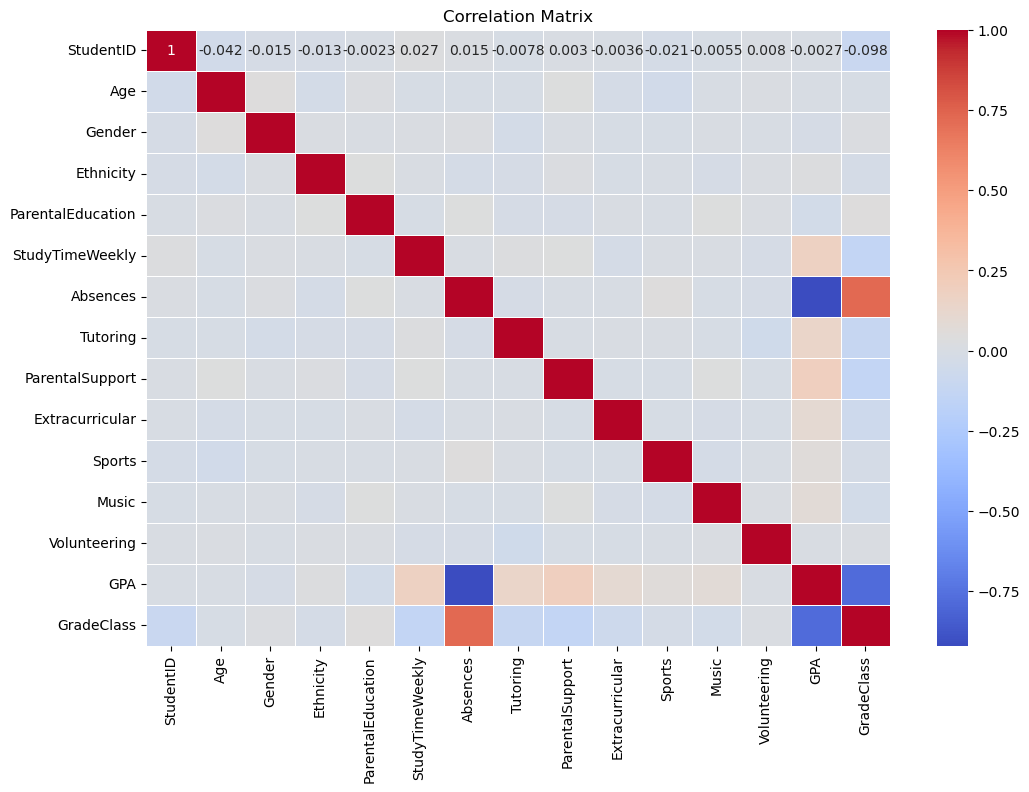

In [5]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

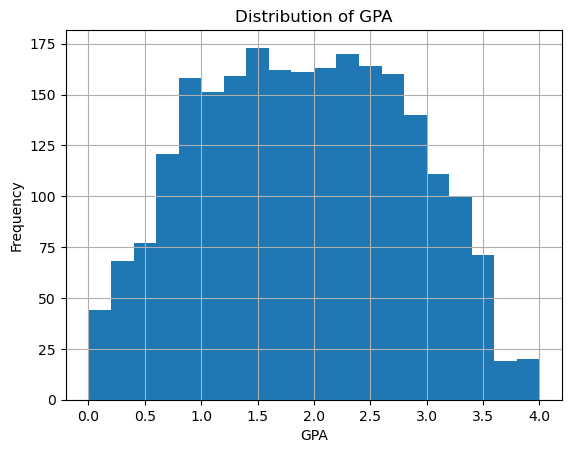

In [6]:
df['GPA'].hist(bins=20)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

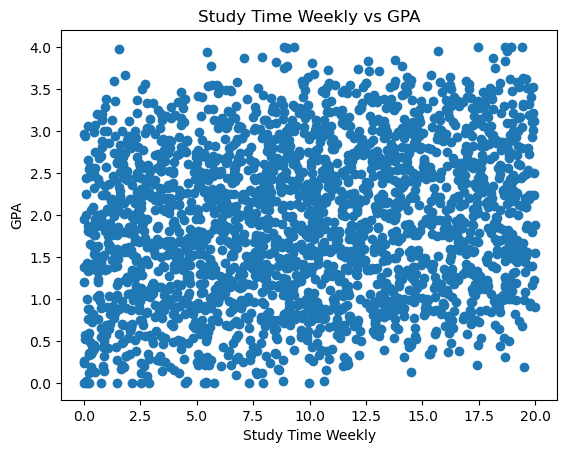

In [7]:
plt.scatter(df['StudyTimeWeekly'], df['GPA'])
plt.title('Study Time Weekly vs GPA')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.show()

In [92]:
df.drop(['StudentID','GPA'],axis=1)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,4
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,2
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1


In [8]:
df = df[(df['StudyTimeWeekly'] <= 20) & (df['GPA'] > 0)]
df = df.dropna()

In [11]:
X = df.drop(['GradeClass'], axis=1)
y = df['GradeClass']

In [17]:
scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y, train_size=0.8, random_state=42, stratify=y)

In [20]:
r_clf = RandomForestClassifier()
r_clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred=r_clf.predict(X_test)

In [25]:
clas_rep = classification_report(y_pred,y_test)
print(clas_rep)

              precision    recall  f1-score   support

         0.0       0.29      0.86      0.43         7
         1.0       0.87      0.85      0.86        55
         2.0       0.95      0.91      0.93        81
         3.0       0.92      0.88      0.90        86
         4.0       0.97      0.95      0.96       247

    accuracy                           0.92       476
   macro avg       0.80      0.89      0.82       476
weighted avg       0.94      0.92      0.93       476



In [27]:
scores = cross_val_score(r_clf, X_scaler, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.97478992 0.98105263 0.98526316 0.95789474 0.68421053]
Mean cross-validation score: 0.9166421937195931


In [29]:
param_distributions = {
    'n_estimators': [int(x) for x in range(100,1200,100)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in range(10,110,10)] + [None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True,False]
}

In [31]:
random_search = RandomizedSearchCV(estimator=r_clf,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

In [32]:
random_search.fit(X_scaler,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100]},
                   random_state=42, verbose=2)

In [33]:
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [37]:
best_r_clf = random_search.best_estimator_
y_pred = best_r_clf.predict(X_test)

In [39]:
class_rep = classification_report(y_test, y_pred)
print(class_rep)

              precision    recall  f1-score   support

         0.0       0.92      0.57      0.71        21
         1.0       0.94      0.94      0.94        54
         2.0       0.95      0.96      0.96        78
         3.0       0.90      0.93      0.91        83
         4.0       0.96      0.97      0.97       240

    accuracy                           0.94       476
   macro avg       0.93      0.88      0.90       476
weighted avg       0.94      0.94      0.94       476



In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**CatBoost**

In [73]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100]
}

In [74]:
cat_clf = CatBoostClassifier() 

In [75]:
grid_search = GridSearchCV(estimator=cat_clf,
                           param_grid=param_grid,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

In [76]:
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\ivanr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
11 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ivanr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ivanr\anaconda3\Lib\site-packages\catboost\core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\ivanr\anaconda3\Lib\site-packages\catboost\core.py", line 2400,

0:	learn: 1.4736628	total: 133ms	remaining: 39.7s
1:	learn: 1.3786402	total: 139ms	remaining: 20.8s
2:	learn: 1.3003809	total: 146ms	remaining: 14.4s
3:	learn: 1.2334807	total: 151ms	remaining: 11.2s
4:	learn: 1.1682328	total: 157ms	remaining: 9.26s
5:	learn: 1.1179600	total: 163ms	remaining: 7.97s
6:	learn: 1.0681954	total: 168ms	remaining: 7.03s
7:	learn: 1.0211391	total: 174ms	remaining: 6.34s
8:	learn: 0.9870941	total: 179ms	remaining: 5.8s
9:	learn: 0.9511050	total: 185ms	remaining: 5.37s
10:	learn: 0.9175079	total: 191ms	remaining: 5.02s
11:	learn: 0.8809911	total: 194ms	remaining: 4.65s
12:	learn: 0.8501230	total: 200ms	remaining: 4.41s
13:	learn: 0.8196946	total: 205ms	remaining: 4.19s
14:	learn: 0.7925407	total: 211ms	remaining: 4.01s
15:	learn: 0.7632063	total: 216ms	remaining: 3.83s
16:	learn: 0.7389112	total: 221ms	remaining: 3.69s
17:	learn: 0.7137623	total: 227ms	remaining: 3.55s
18:	learn: 0.6933111	total: 232ms	remaining: 3.43s
19:	learn: 0.6732344	total: 238ms	remainin

193:	learn: 0.2752676	total: 1.21s	remaining: 661ms
194:	learn: 0.2747730	total: 1.22s	remaining: 655ms
195:	learn: 0.2740683	total: 1.22s	remaining: 649ms
196:	learn: 0.2736800	total: 1.23s	remaining: 643ms
197:	learn: 0.2730845	total: 1.23s	remaining: 636ms
198:	learn: 0.2723384	total: 1.24s	remaining: 629ms
199:	learn: 0.2718514	total: 1.25s	remaining: 623ms
200:	learn: 0.2712906	total: 1.25s	remaining: 616ms
201:	learn: 0.2705269	total: 1.26s	remaining: 610ms
202:	learn: 0.2699070	total: 1.26s	remaining: 603ms
203:	learn: 0.2694879	total: 1.27s	remaining: 597ms
204:	learn: 0.2691057	total: 1.27s	remaining: 590ms
205:	learn: 0.2685361	total: 1.28s	remaining: 584ms
206:	learn: 0.2680212	total: 1.28s	remaining: 578ms
207:	learn: 0.2676192	total: 1.29s	remaining: 571ms
208:	learn: 0.2672034	total: 1.3s	remaining: 565ms
209:	learn: 0.2667136	total: 1.3s	remaining: 558ms
210:	learn: 0.2660117	total: 1.31s	remaining: 552ms
211:	learn: 0.2655495	total: 1.31s	remaining: 545ms
212:	learn: 0.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000017300303D50>,
             n_jobs=-1,
             param_grid={'border_count': [32, 50, 100], 'depth': [4, 6, 8, 10],
                         'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [78]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'border_count': 100, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.05}


In [79]:
best_cb_clf = grid_search.best_estimator_
y_pred= best_cb_clf.predict(X_test_scaled)

In [81]:
class_rep_catboost = classification_report(y_test,y_pred)
print(class_rep_catboost)

              precision    recall  f1-score   support

         0.0       0.91      0.48      0.62        21
         1.0       0.92      0.83      0.87        54
         2.0       0.88      0.95      0.91        78
         3.0       0.86      0.90      0.88        83
         4.0       0.95      0.97      0.96       240

    accuracy                           0.92       476
   macro avg       0.90      0.83      0.85       476
weighted avg       0.92      0.92      0.91       476

